In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df= pd.read_excel("UNRATE.xlsx", index_col='observation_date', 
                 parse_dates=True)
df.head()

,UNRATE
observation_date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [ ]:
df.shape

(898, 1)

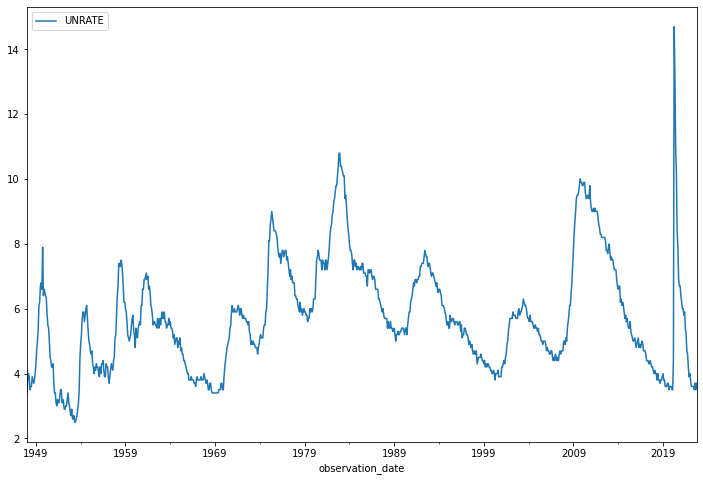

In [ ]:
fig, ax = plt.subplots()
df.plot(ax=ax, figsize=(12, 8))
plt.show()


In [ ]:
df1= df['1980':]

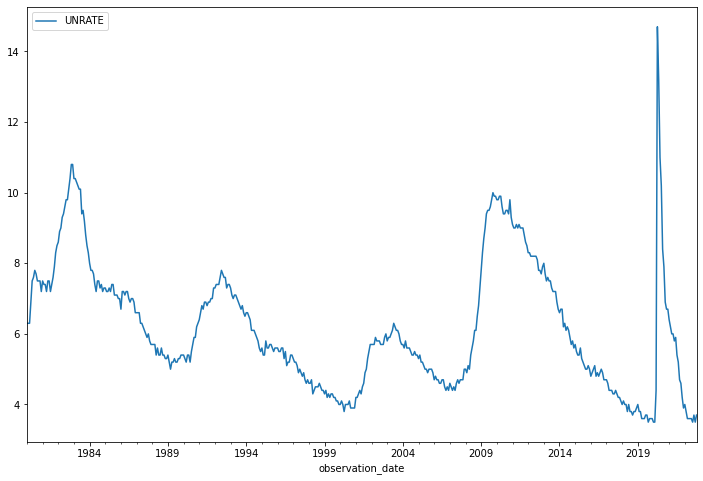

In [ ]:
fig, ax = plt.subplots()
df1.plot(ax=ax, figsize=(12, 8))
plt.show()

**CHECKING SEASONALITY AND TREND**

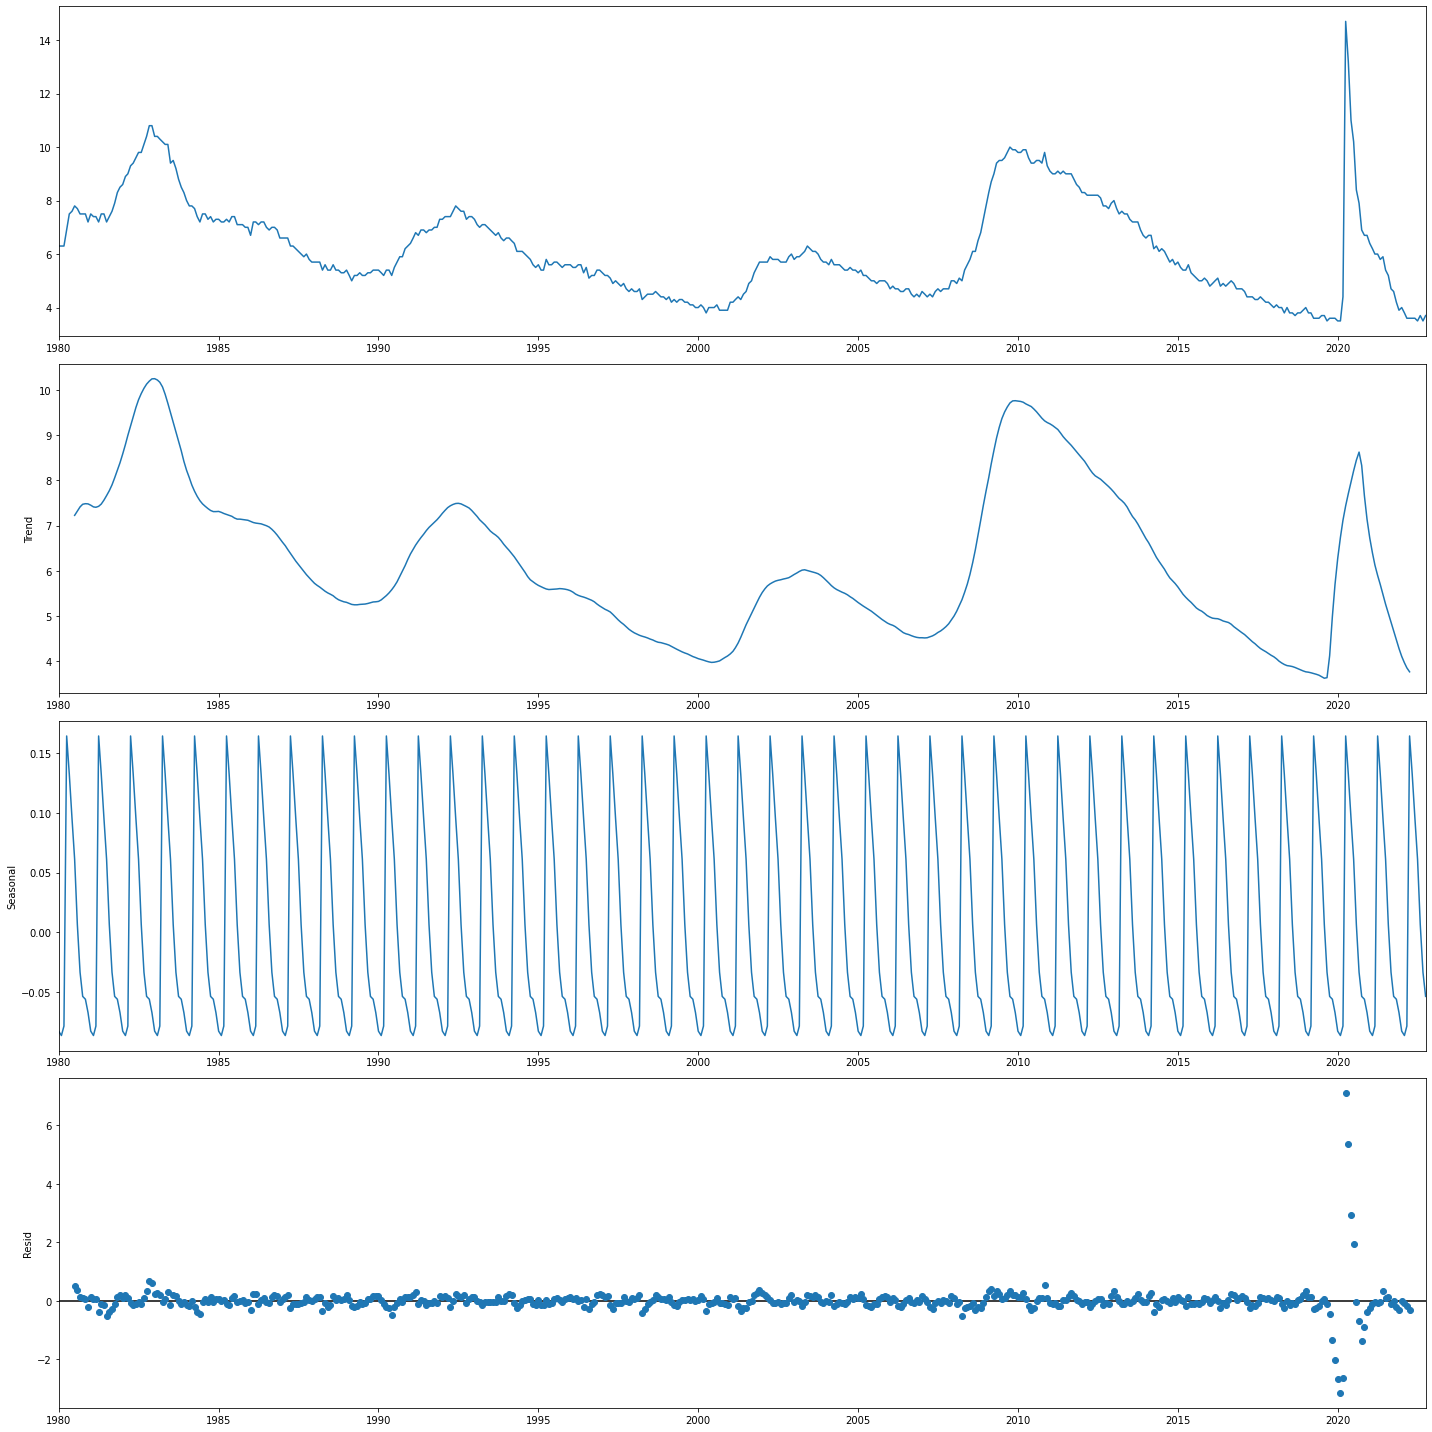

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20
decomposition = sm.tsa.seasonal_decompose(df1, model='additive')
fig = decomposition.plot()
plt.show()

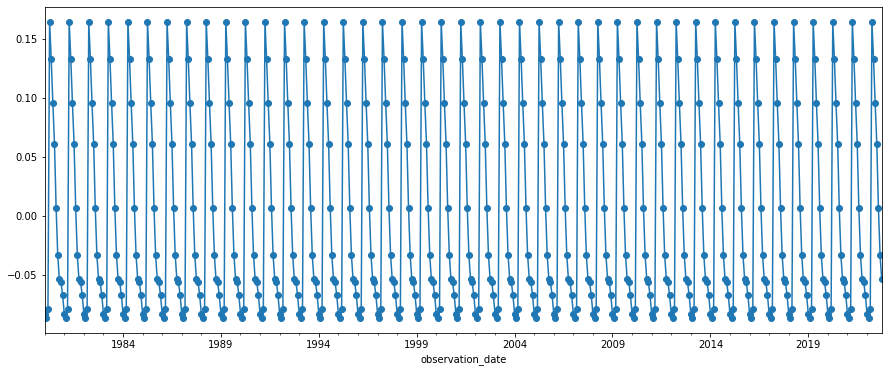

In [ ]:
plt.figure(figsize=(15,6))
decomposition.seasonal.plot(marker="o")

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Run test
result = adfuller(df1['UNRATE'])

print("Augmented Dickey Fuller Test")
# Print test statistic
print("Test Statistic" )
print(result[0])

# Print p-value
print("p-value" )
print(result[1])

# Print critical values
print("the critical values are")
print(result[4])

Augmented Dickey Fuller Test
Test Statistic
-2.9679634543166884
p-value
0.03799646421703428
the critical values are
{'1%': -3.4432119442564324, '5%': -2.8672126791646955, '10%': -2.569791324979607}


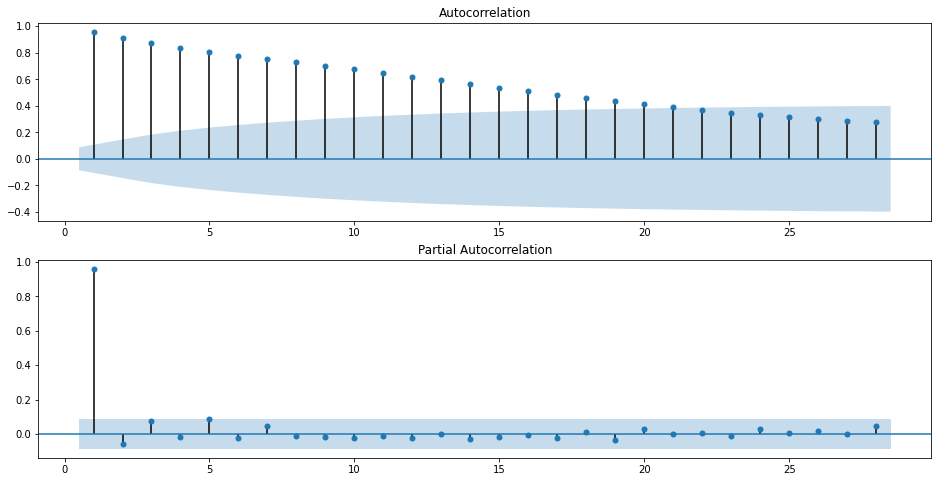

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))


plot_acf(df1['UNRATE'],  ax=ax[0], zero=False)
plot_pacf(df1['UNRATE'], ax=ax[1], zero=False)


plt.show()

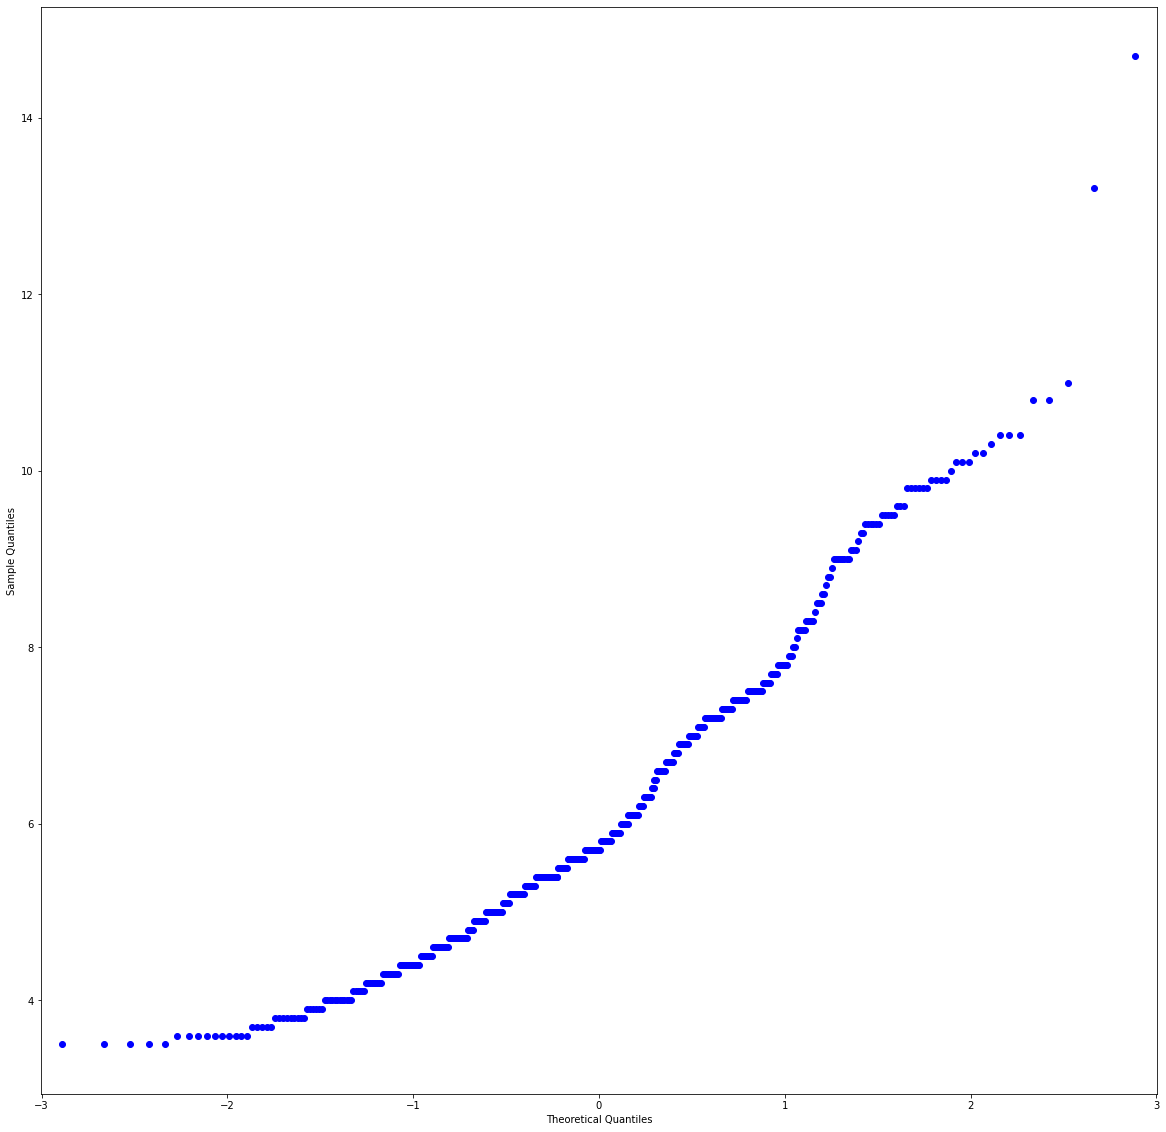

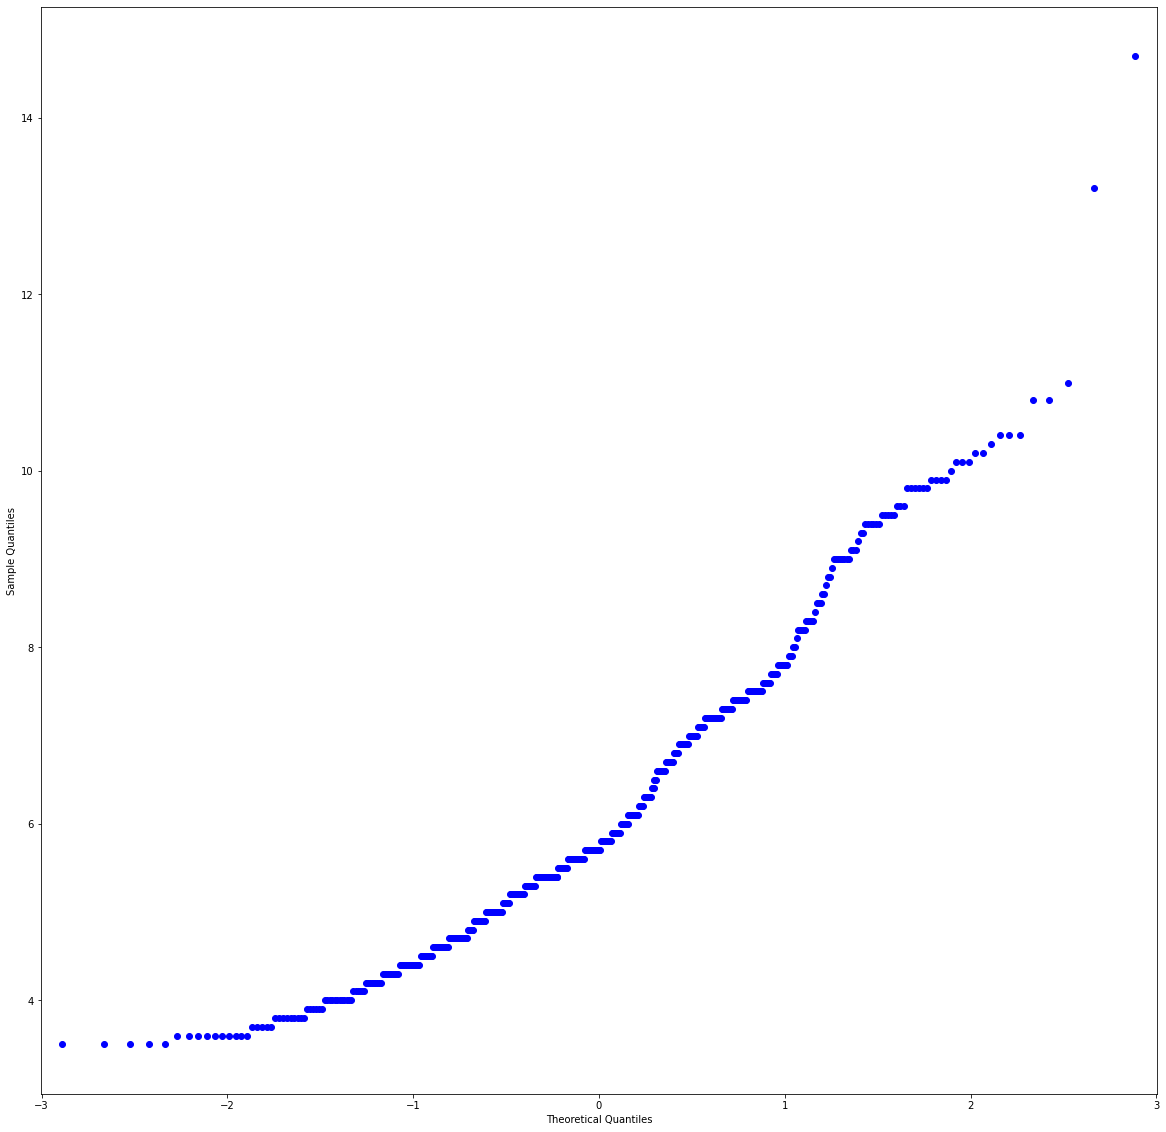

In [ ]:
import statsmodels.api as sm
sm.qqplot(df1['UNRATE'])

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df1 ,order=(1, 0, 0), seasonal_order=(0, 0, 0 ,12), enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 UNRATE   No. Observations:                  514
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -382.964
Date:                Wed, 28 Dec 2022   AIC                            769.928
Time:                        14:43:01   BIC                            778.409
Sample:                    01-01-1980   HQIC                           773.252
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9962      0.005    196.960      0.000       0.986       1.006
sigma2         0.2606      0.002    156.538      0.000       0.257       0.264
Ljung-Box (L1) (Q):                   0.51   Jarque-

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


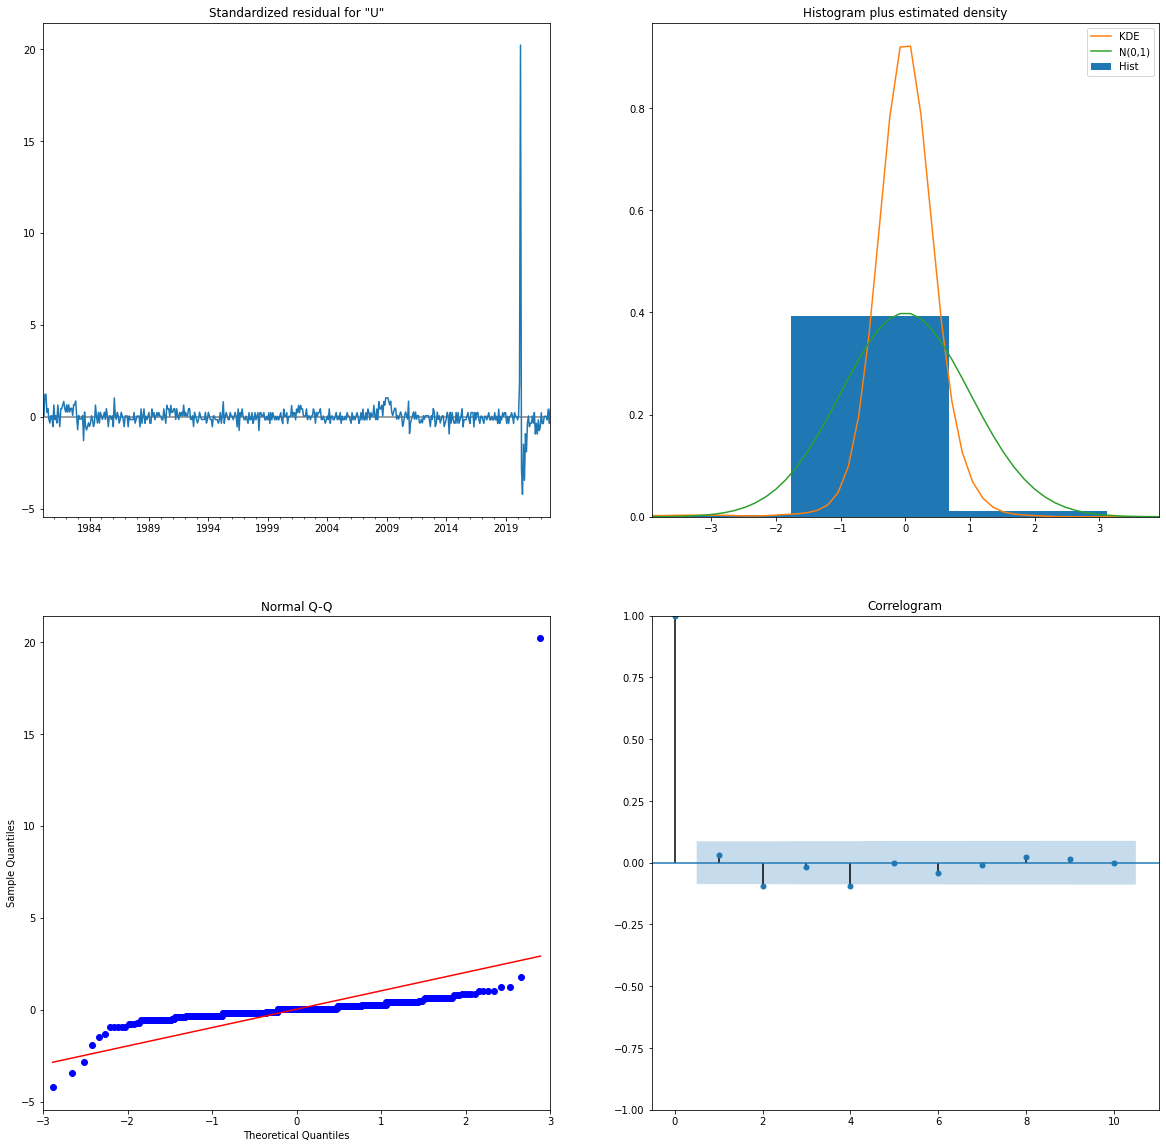

In [ ]:
results.plot_diagnostics()
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


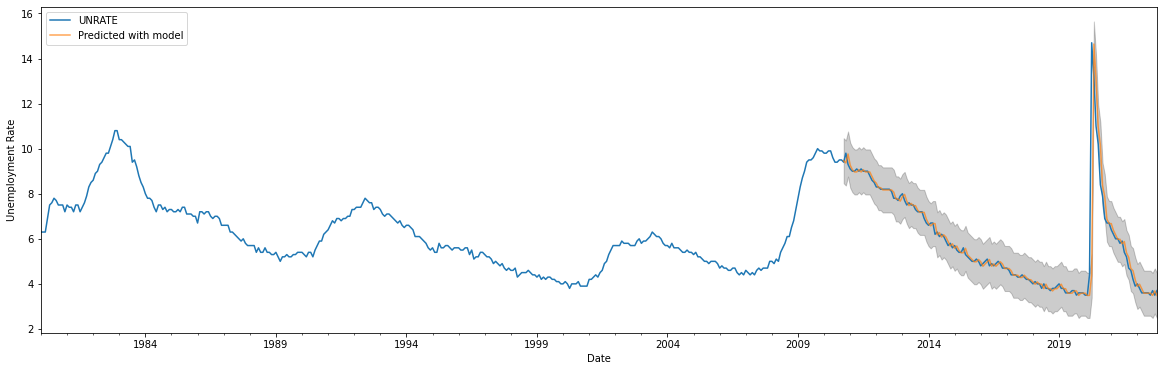

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2010-10-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df1['1980':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted with model', alpha=.7, figsize=(20, 6))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate')
plt.legend()
plt.show()

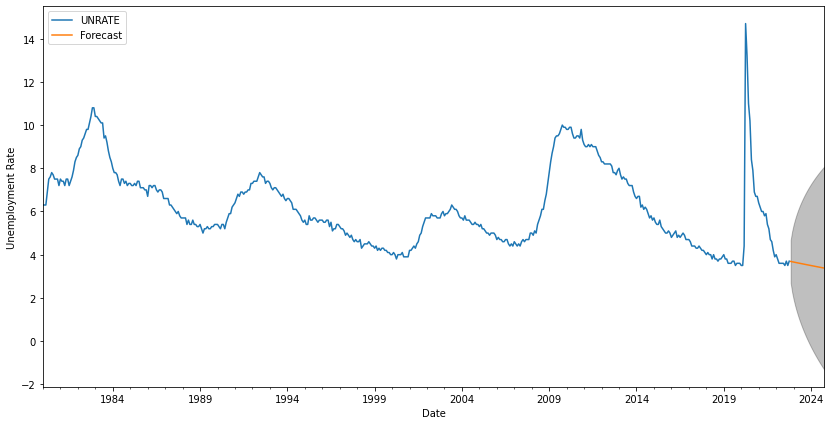

In [ ]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = df1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate')
plt.legend()
plt.show()